# Prediction of sales margins using exogenous parameter

In [1]:
%load_ext autoreload
%autoreload 2

In [16]:
import pandas as pd
import numpy as np
from os.path import expanduser
from matplotlib.ticker import MaxNLocator, FuncFormatter
import matplotlib.pyplot as plt
import matplotx
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from keras import models
from keras import layers
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier



from mlexample.multiclass_example import read_data, generate_classes, create_data


HOME=expanduser("~")

In [3]:
dfx=read_data("sales_data.csv")
dfx.shape

(113456, 13)

In [4]:
from mlexample.multiclass_example import pre_process_data
dfi1=pre_process_data(dfx)
dfi1.shape


(113439, 82)

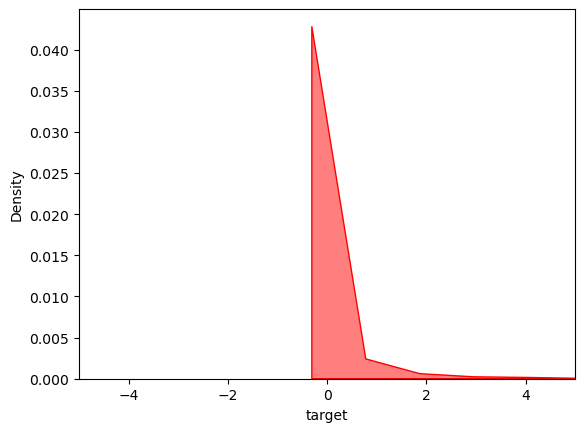

In [7]:
sns.kdeplot(dfi1["target"],fill=True, color="red", alpha=0.5)
plt.xlim(-5,5)
plt.show()

In [11]:
generate_classes(dfi1)
X,y=create_data(dfi1)

X_train, X_test, y_train, y_test, =train_test_split(X,y,test_size=0.2,shuffle=True)

lo=-100.0000...hi=-0.0163
lo=-0.0163...hi=-0.0148
lo=-0.0148...hi=-0.0146
lo=-0.0146...hi=215.7883


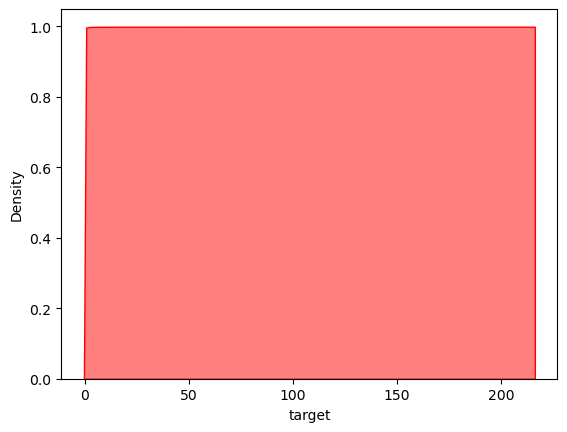

In [12]:
sns.kdeplot(dfi1["target"],fill=True, color="red", alpha=0.5,cumulative=True)

plt.show()

In [13]:
dfi1.shape

(113439, 83)

In [14]:
X, y = create_data(dfi1)
X_train, X_test, y_train, y_test, =train_test_split(X,y,test_size=0.2,shuffle=True)

In [17]:
print(f"X.shape: {X_train.shape}")
print(f"y.shape: {y_train.shape}")

X.shape: (90751, 81)
y.shape: (90751, 4)


In [18]:
# First define baseline model. Then use it in Keras Classifier for the training

from mlexample.multiclass_example import baseline_model
seed=42
model=baseline_model(X,y)
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
history=model.fit(X_train, y_train, epochs=20, batch_size=64, verbose=1, validation_data=(X_test,y_test))

Epoch 1/20
1418/1418 [==============================] - 3s 1ms/step - loss: 1.1068 - accuracy: 0.3877 - val_loss: 1.0560 - val_accuracy: 0.4329
Epoch 2/20
1418/1418 [==============================] - 2s 1ms/step - loss: 1.0629 - accuracy: 0.4194 - val_loss: 1.0476 - val_accuracy: 0.4416
Epoch 3/20
1418/1418 [==============================] - 2s 1ms/step - loss: 1.0530 - accuracy: 0.4397 - val_loss: 1.0358 - val_accuracy: 0.4657
Epoch 4/20
1418/1418 [==============================] - 2s 1ms/step - loss: 1.0386 - accuracy: 0.4539 - val_loss: 1.0152 - val_accuracy: 0.4870
Epoch 5/20
1418/1418 [==============================] - 2s 1ms/step - loss: 1.0257 - accuracy: 0.4688 - val_loss: 1.0042 - val_accuracy: 0.4952
Epoch 6/20
1418/1418 [==============================] - 2s 1ms/step - loss: 1.0179 - accuracy: 0.4785 - val_loss: 0.9972 - val_accuracy: 0.5027
Epoch 7/20
1418/1418 [==============================] - 2s 1ms/step - loss: 1.0144 - accuracy: 0.4855 - val_loss: 0.9935 - val_accuracy:

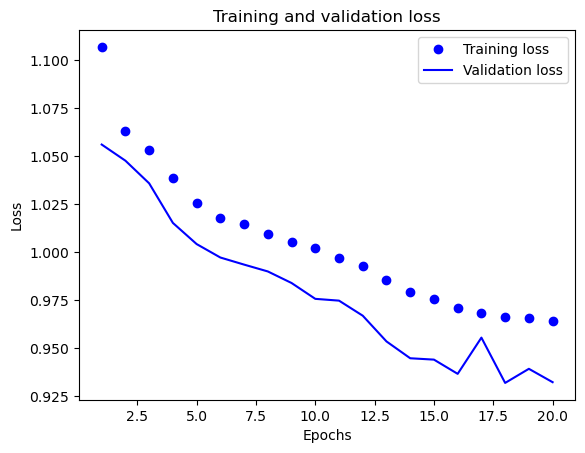

In [20]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [21]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

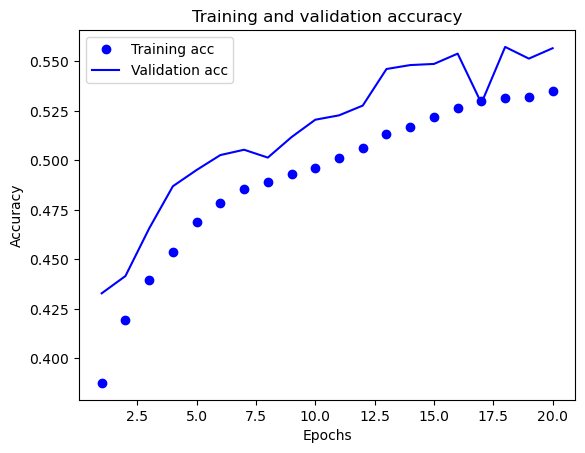

In [22]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

709/709 [==============================] - 1s 1ms/step - loss: 0.9323 - accuracy: 0.5567
test loss, test acc: [0.9322701096534729, 0.5566819310188293]


In [256]:
# Kfold cross validation
kfold = KFold(n_splits = 10, shuffle = True, random_state = seed)
cvscores = []
for train, test in kfold.split(X, y):    
    _X = X.loc[train]
    _y = y.loc[train]
    
    #print(train)
    
    _Xtest=X.loc[test]
    _ytest=y.loc[test]
    model=baseline_model(_X,_y)
    model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
    model.fit(_X, _y, epochs=20, batch_size=64, verbose=0)
    scores = model.evaluate(_Xtest, _ytest, verbose=0)
    print(f"{model.metrics_names[1]}: {scores[1]:.4f}")
    cvscores.append(scores[1] * 100)

print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

accuracy: 0.5511
accuracy: 0.5512
accuracy: 0.5642
accuracy: 0.5586
accuracy: 0.5390
accuracy: 0.5536
accuracy: 0.5583
accuracy: 0.5377
accuracy: 0.5359
accuracy: 0.5472
54.97% (+/- 0.92%)
